Import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Import linear regression data

In [5]:
df = pd.read_csv("../../data/homework.csv")

# Compare every value is Null and summaries them, calculates as number eventually.
print(df.isnull().values.sum())

print(f"Shape: {df.shape}")
print(f"Variables: {df.keys()}")
print(f"The first data content:\n{df.iloc[0,::]}")

# Becaues we are going to predict the future Income, so we set the target as "Income".
print(f'The first awaited predict target: {df["Income"][0]}')

0
Shape: (133, 2)
Variables: Index(['MileagePerPerson', 'Income'], dtype='object')
The first data content:
MileagePerPerson    150073966
Income              333641788
Name: 0, dtype: int64
The first awaited predict target: 333641788


Setup figures

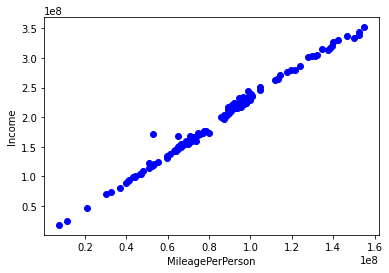

In [6]:
plt.scatter(df.MileagePerPerson, df.Income, color="b")
plt.xlabel("MileagePerPerson")
plt.ylabel("Income")
plt.savefig(f"./figures/homework/Original_Data.jpg")

Prepare train data and test data for model

In [7]:
x = df.drop("Income", axis=1)
y = df["Income"]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Original data shape: {df.shape}")
print(f"Tranning data shape: {train_x.shape}")
print(f"Testing data shape: {test_x.shape}")

Original data shape: (133, 2)
Tranning data shape: (106, 1)
Testing data shape: (27, 1)


Trainning

In [8]:
model = LinearRegression()
model.fit(train_x, train_y)
print(f"Coefficients: {model.coef_}")    # 模型係數
print(f"Intercept: {model.intercept_}")  # 截距

Coefficients: [2.3248781]
Intercept: -966454.5677380264


Import test data to model for predictions and calculate MSE

Using formula `MSE(Mean Square Error)` to fine a least `Loss` line

$$MSE = \frac{\sum_{i=1}^{n}(yi-\hat{y}i)^2}{n}$$

In [9]:
pred = model.predict(test_x)
score = mean_squared_error(pred, test_y)
print(f"MSE: {score}")

MSE: 27636230501588.547


Linear regression

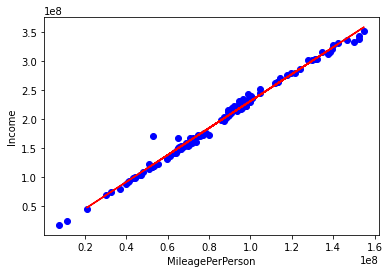

In [11]:
plt.scatter(x, y, color="b")
plt.plot(test_x.values.tolist(), pred, color="r")
plt.xlabel("MileagePerPerson")
plt.ylabel("Income")
plt.savefig(f"./figures/homework/Regression_Data.jpg")